In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# Get the data from the dataset
data = pd.read_csv("./data/dataset1.csv")
data.reset_index(inplace=True)
data.columns = ['X1', 'X2', 'y']
data.head()
df = data.copy()
df.head()

# Get the features from the dataset
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

print(X)

[[ 0.04  0.4 ]
 [-0.12 -0.62]
 [ 0.14 -0.42]
 ...
 [ 0.13 -0.45]
 [-0.11 -0.79]
 [ 0.69 -0.83]]


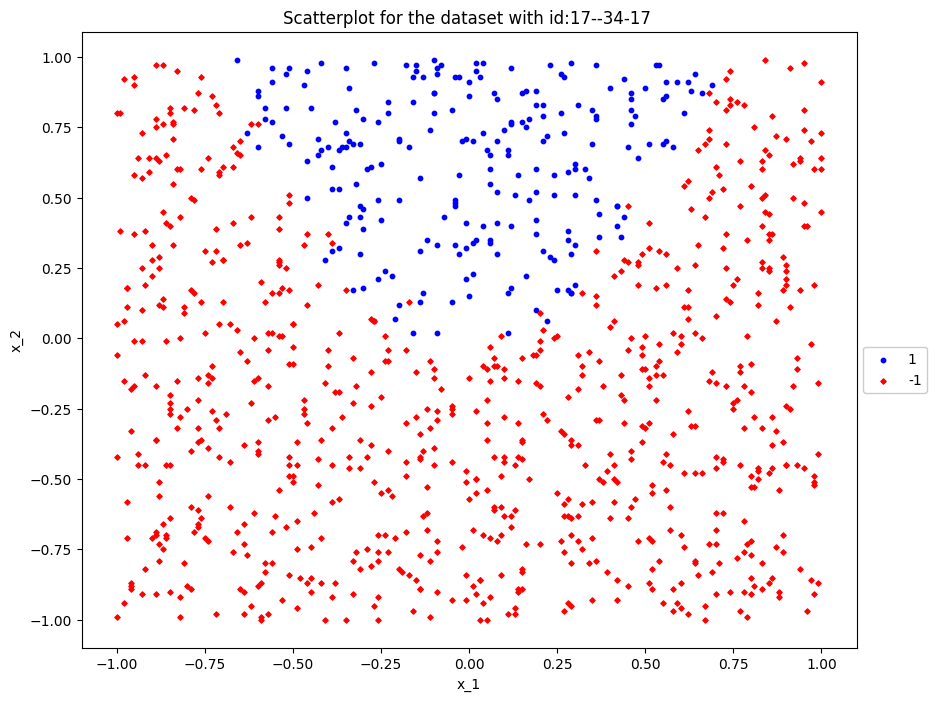

In [21]:
# Data graph

plt.figure(figsize=(10, 8))
plt.style.use('default')
plt.scatter(X1[y==1], X2[y==1], c='b', marker = 'o', label='1', s=10)
plt.scatter(X1[y==-1], X2[y==-1], c='r', marker = 'D', label='-1', s=7)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatterplot for the dataset with id:17--34-17 ')
plt.legend(bbox_to_anchor=(1.1,0.5), loc='upper right', fancybox=True, framealpha=1, fontsize=10)

## Logistic Regression

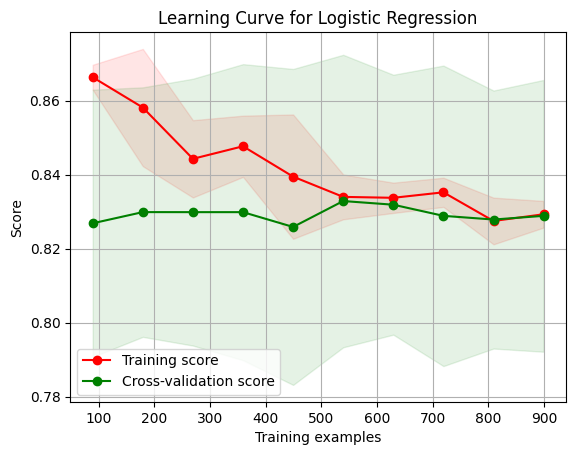

In [22]:
lr_model=LogisticRegression()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Stadard deviation shadow
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [23]:
# Having seen that with 800 training samples our model will perform with a 0.83 score, we will take 80% of the data for training

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print('Train Set: ', x_train.shape, y_train.shape)
print('Test Set: ', x_test.shape, y_test.shape)

Train Set:  (799, 2) (799,)
Test Set:  (200, 2) (200,)


In [24]:
lr_model.fit(x_train, y_train)
print('The coefficients are: ',lr_model.coef_[0])
print('The intercept is: ',lr_model.intercept_)

The coefficients are:  [-0.08423714  3.59935851]
The intercept is:  [-2.10980671]


Feature: 0, Score: -0.08424
Feature: 1, Score: 3.59936


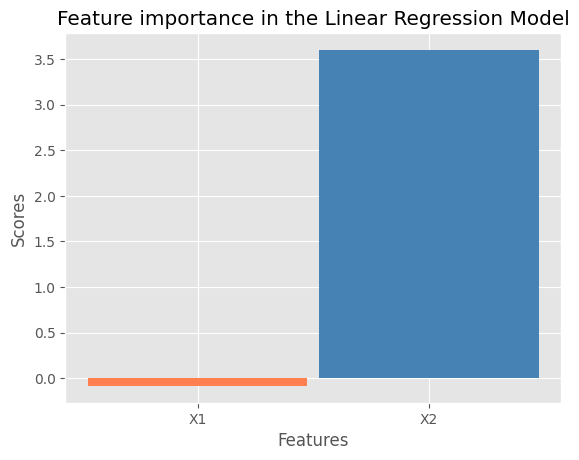

In [25]:
feature_importance = lr_model.coef_[0]
for i,val in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f' % (i,val))

with plt.style.context('ggplot'):
    plt.bar(['X1', 'X2'], feature_importance, width=0.95, color=['coral', 'steelblue'])
    plt.title('Feature importance in the Linear Regression Model')
    plt.xlabel('Features')
    plt.ylabel('Scores')
    plt.show()

In [26]:
predictions = lr_model.predict(x_test)
score = lr_model.score(x_test, y_test)
print('The score is: ', score)

print(classification_report(y_test, predictions))

The score is:  0.83
              precision    recall  f1-score   support

          -1       0.88      0.89      0.89       147
           1       0.69      0.66      0.67        53

    accuracy                           0.83       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.83      0.83      0.83       200



[[131  16]
 [ 18  35]]


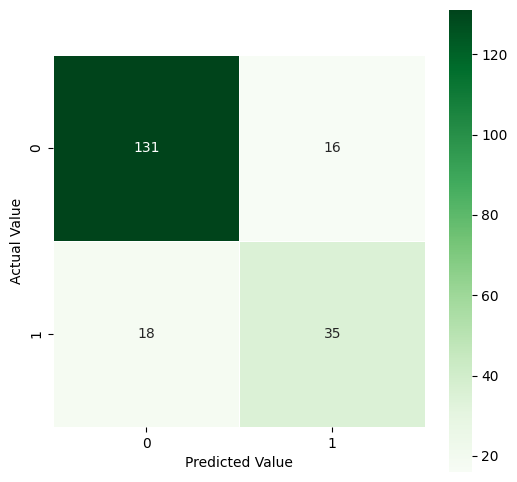

In [27]:
cm = confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual Value');
plt.xlabel('Predicted Value');
all_sample_title = 'Accuracy: {0}'.format(score)